## 第一題

以 SenseTagger 處理本週語料（教科書課文.csv）之後，請從 `的、還、就、又、也` 之中選擇一個詞，統計出這個詞的 所有sense 在1～6年級課文的數量分佈，

*   (a). 先以 **DataFrame** 列出結果（30%）
    - 參見下方範例 df
    - 若是該詞擁有 8 個 Sense Type 則會有 8 個 rows
*   (b). 再畫一張**折線圖**（30%）
    
    - x軸為年級，y軸為數量，折線顏色為該詞的不同Sense Type，請列出圖例 (legend)
    - 若是該詞擁有 8 個 Sense Type 則會有 8 條線
    - 參見下方範例折線圖



In [ ]:
# 範例 DataFrame
##「而」的3個SenseType在不同年級的數量分佈
df

,SenseType,一,二,三,四,五,六,Total
0,表言談中用來表主題的轉折。,4,13,11,4,6,7,45
1,表後述事件緊接著前述事件發生。,10,10,2,3,4,16,45
2,連接前述原因和後述結果的詞組，用以表示因果關係。,2,3,18,7,12,2,44


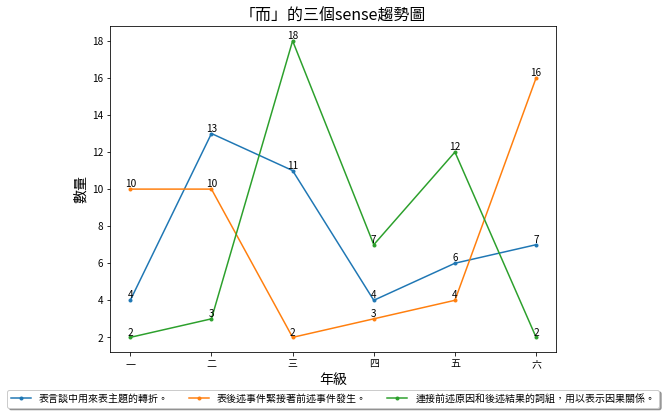

In [ ]:
# 範例折線圖
plt.show()

In [1]:
!pip install -U gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/seantyh/dwsd-beta

Cloning into 'dwsd-beta'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
Unpacking objects: 100% (13/13), 6.02 KiB | 1.51 MiB/s, done.
remote: Total 13 (delta 0), reused 13 (delta 0), pack-reused 0


In [3]:
!pip3 install -q CwnGraph transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.9 MB/s eta 0:00:00


In [4]:
import sys
if "dwsd-beta" not in sys.path:
  sys.path.append("dwsd-beta")

In [5]:
from dotted_wsd import DottedWsdTagger

updating manifest...
manifest version:  v2022.08


In [6]:
tagger = DottedWsdTagger()

downloading image: 18Dmy2fU6qGfFOsS3iCV7j-5u9xz6LfdP...


Downloading...
From: https://drive.google.com/uc?id=18Dmy2fU6qGfFOsS3iCV7j-5u9xz6LfdP
To: /content/cwn-graph-v.2020.05.pyobj
100%|██████████| 24.7M/24.7M [00:00<00:00, 25.3MB/s]


image has downloaded:  cwn-graph-v.2020.05.pyobj


Downloading...
From: https://drive.google.com/uc?id=14Ea1KtIC7zBQ9lFh-vwbKLuiftpabIoo
To: /content/dotted-wsd.zip
100%|██████████| 380M/380M [00:01<00:00, 269MB/s]


In [7]:
!pip3 install -U DistilTag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import DistilTag
DistilTag.download()

Downloading...
From: https://drive.google.com/uc?id=1AzUICPQ5MMt_IWg4JZ3mWM6vGbQkv01L
To: /tmp/tmpnpkrixcbdistiltag/tagmodel.zip
100%|██████████| 501M/501M [00:06<00:00, 81.2MB/s]


setting up model...
DistilTag model installed.


In [9]:
from DistilTag import DistilTag
distilTagger = DistilTag()

In [11]:
import pandas as pd
df=pd.read_csv('教科書課文.csv')
df[0:5]

,No.,Subject,Grade,Year,Publisher,Type,Lesson,Tittle,Content
0,D001,國語,6下,91,國立編譯館,text,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金..."
1,D002,國語,6下,91,國立編譯館,text,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這..."
2,D003,國語,6下,91,國立編譯館,text,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大..."
3,D004,國語,6下,91,國立編譯館,text,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢..."
4,D005,國語,6下,91,國立編譯館,text,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見..."


In [12]:
#清除不必要的欄位
df = df.drop("Lesson", axis = 1)
df = df.drop("Tittle", axis = 1)
df = df.drop("Type", axis = 1)
df = df.drop("Publisher", axis=1)
df = df.drop("Year", axis=1)
df = df.drop("Subject", axis=1)
df = df.drop("No.", axis=1)
df 

,Grade,Content
0,6下,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金..."
1,6下,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這..."
2,6下,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大..."
3,6下,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢..."
4,6下,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見..."
...,...,...
109,3下,——劇本\n時間：星期日早上八點。\n地點：校門口。\n人物：李國安——國小三年級男生。林大...
110,3下,最初最初，我們這個世界是一團黑忽忽的水氣。巨人盤古，就在這團水氣裡，昏昏沉沉的睡覺，一睡就是...
111,3下,在我家附近，開了許多小吃店。有賣自助餐的，有賣各類麵食的，還有賣雞肉飯的等等。說也奇怪，其中...
112,3下,雨過天青，一道彩虹高高的掛在天空。好多人看見了，忍不住讚嘆：啊，多美麗的彩虹！\n妹妹說：漂...


In [ ]:
#先把「年級」分好
df_6 = df[df['Grade'].isin(['6上','6下'])]
df_5 = df[df['Grade'].isin(['5上','5下'])]
df_4 = df[df['Grade'].isin(['4上','4下'])]
df_3 = df[df['Grade'].isin(['3上','3下'])]
# df_2 = df[df['Grade'].isin(['2上','2下'])]
# df_1 = df[df['Grade'].isin(['1上','1下'])]

In [ ]:
# df_6 6年級

import re

df_6_content = df_6['Content']

cleaned_df_6=[]

for sentence in df_6_content:
  matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
  cleaned_df_6.append(matches)

lll_6=[]

for text in cleaned_df_6:
  new_list=text.split()
  for sense in new_list:
    tagged = distilTagger.tag(sense)
    sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
    lll_6.append(sense_tagged)

chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
de_list=[]

for ll_6 in lll_6:
  for l_6 in ll_6:
    if l_6[0]=='的':
      de_sense = ''.join(chinese_pattern.findall(l_6[2]))  # 提取中文字符並連接成字符串
      de_list.append(de_sense)

de_list[:10]

['表一般的修飾關係用於修飾語和中心語間',
 '列舉相類似的事物',
 '列舉相類似的事物',
 '列舉相類似的事物',
 '列舉相類似的事物',
 '列舉相類似的事物',
 '列舉相類似的事物',
 '表一般的修飾關係用於修飾語和中心語間',
 '表一般的修飾關係用於修飾語和中心語間',
 '列舉相類似的事物']

In [ ]:
from collections import Counter

counts = Counter(de_list)
df_6_de = pd.DataFrame.from_dict(counts, orient='index', columns=['六'])
df_6_de.index.name = 'SenseType'
df_6_de


,六
SenseType,
表一般的修飾關係用於修飾語和中心語間,167
列舉相類似的事物,345
表在前述情況下,121
表領屬關係用於修飾語和中心語間,246
表以前述動作的狀態,205
表使謂語具名詞性用於主語和謂語間,221
表肯定或加強的語氣,87
表對推論的肯定,6
表前述對象是離合動賓動詞的賓語,1


In [ ]:
# df_5 5年級

import re

df_5_content = df_5['Content']

cleaned_df_5=[]

for sentence in df_5_content:
  matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
  cleaned_df_5.append(matches)


lll_5=[]

for text in cleaned_df_5:
  new_list=text.split()
  for sense in new_list:
    tagged = distilTagger.tag(sense)
    sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
    lll_5.append(sense_tagged)

chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
de_list=[]

for ll_5 in lll_5:
  for l_5 in ll_5:
    if l_5[0]=='的':
      de_sense = ''.join(chinese_pattern.findall(l_5[2]))  # 提取中文字符並連接成字符串
      de_list.append(de_sense)

from collections import Counter

counts = Counter(de_list)
df_5_de = pd.DataFrame.from_dict(counts, orient='index', columns=['五'])
df_5_de.index.name = 'SenseType'
df_5_de

,五
SenseType,
表以前述動作的狀態,105
表領屬關係用於修飾語和中心語間,163
表在前述情況下,101
表使謂語具名詞性用於主語和謂語間,102
表一般的修飾關係用於修飾語和中心語間,117
列舉相類似的事物,211
表前述對象是離合動賓動詞的賓語,3
表肯定或加強的語氣,72
表對推論的肯定,6


In [ ]:
# df_4 4年級

import re

df_4_content = df_4['Content']

cleaned_df_4=[]

for sentence in df_4_content:
  matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
  cleaned_df_4.append(matches)


lll_4=[]

for text in cleaned_df_4:
  new_list=text.split()
  for sense in new_list:
    tagged = distilTagger.tag(sense)
    sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
    lll_4.append(sense_tagged)

chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
de_list=[]

for ll_4 in lll_4:
  for l_4 in ll_4:
    if l_4[0]=='的':
      de_sense = ''.join(chinese_pattern.findall(l_4[2]))  # 提取中文字符並連接成字符串
      de_list.append(de_sense)

from collections import Counter

counts = Counter(de_list)
df_4_de = pd.DataFrame.from_dict(counts, orient='index', columns=['四'])
df_4_de.index.name = 'SenseType'
df_4_de

,四
SenseType,
表一般的修飾關係用於修飾語和中心語間,92
表以前述動作的狀態,76
列舉相類似的事物,185
表在前述情況下,49
表領屬關係用於修飾語和中心語間,120
表使謂語具名詞性用於主語和謂語間,55
表肯定或加強的語氣,48
表對推論的肯定,2
表前述對象是離合動賓動詞的賓語,1


In [ ]:
# df_3 3年級

import re

df_3_content = df_3['Content']

cleaned_df_3=[]

for sentence in df_3_content:
  matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
  cleaned_df_3.append(matches)

lll_3=[]

for text in cleaned_df_3:
  new_list=text.split()
  for sense in new_list:
    tagged = distilTagger.tag(sense)
    sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
    lll_3.append(sense_tagged)

chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
de_list=[]

for ll_3 in lll_3:
  for l_3 in ll_3:
    if l_3[0]=='的':
      de_sense = ''.join(chinese_pattern.findall(l_3[2]))  # 提取中文字符並連接成字符串
      de_list.append(de_sense)

from collections import Counter

counts = Counter(de_list)
df_3_de = pd.DataFrame.from_dict(counts, orient='index', columns=['三'])
df_3_de.index.name = 'SenseType'
df_3_de

,三
SenseType,
表在前述情況下,24
列舉相類似的事物,76
表一般的修飾關係用於修飾語和中心語間,35
表以前述動作的狀態,50
表使謂語具名詞性用於主語和謂語間,15
表肯定或加強的語氣,16
表領屬關係用於修飾語和中心語間,57
表對推論的肯定,3


In [ ]:
merged_df = pd.merge(df_3_de, df_4_de, how='outer', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_5_de, how='outer', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_6_de, how='outer', left_index=True, right_index=True)

In [ ]:
#將 NaN 值替換為 0
cons_df = merged_df.fillna(0).astype(int)
#新增 Total 欄位
cons_df_total = cons_df.assign(Total=cons_df['三'] + cons_df['四'] + cons_df['五'] + cons_df['六'])
cons_df_total

,三,四,五,六,Total
SenseType,,,,,
列舉相類似的事物,76,185,211,345,817
表一般的修飾關係用於修飾語和中心語間,35,92,117,167,411
表以前述動作的狀態,50,76,105,205,436
表使謂語具名詞性用於主語和謂語間,15,55,102,221,393
表前述對象是離合動賓動詞的賓語,0,1,3,1,5
表在前述情況下,24,49,101,121,295
表對推論的肯定,3,2,6,6,17
表肯定或加強的語氣,16,48,72,87,223
表領屬關係用於修飾語和中心語間,57,120,163,246,586


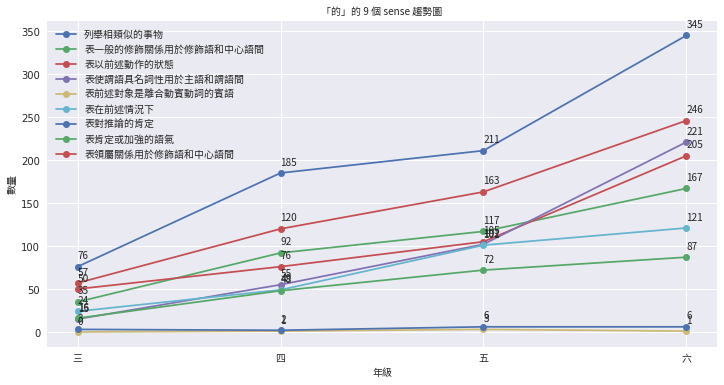

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font

#新增中文字型
font1 = font(fname="NotoSansTC-Regular.otf")

plt.style.use('seaborn')

# 建立物件-圖和座標軸
fig, ax = plt.subplots(figsize=(12, 6))

for i, sense_type in enumerate(cons_df.index):
    ax.plot(cons_df.columns, cons_df.loc[sense_type], label=sense_type, marker='o')
    for x, y in zip(cons_df.columns, cons_df.loc[sense_type]):
      ax.annotate(str(y), xy=(x, y), xytext=(0, 8), textcoords='offset points', fontproperties=font1)

ax.set_xlabel('年級', fontproperties=font1)
ax.set_ylabel('數量', fontproperties=font1)
ax.set_title('「的」的 9 個 sense 趨勢圖', fontproperties=font1)
ax.legend(prop=font1)

ax.set_xticks(cons_df.columns)
ax.set_xticklabels(cons_df.columns, fontproperties=font1)

plt.show()

## 第二題


請利用你回答第一題的過程，**寫出一個function** （40%）

此function需要能讓我們直接查詢某個詞 ( `input為string` )，就獲得該詞的趨勢折線圖（ `output為和第一題範例類似的折線圖` ）

In [13]:
def search_word_sense(word):
    import pandas as pd
    df=pd.read_csv('教科書課文.csv')

    df = df.drop("Lesson", axis = 1)
    df = df.drop("Tittle", axis = 1)
    df = df.drop("Type", axis = 1)
    df = df.drop("Publisher", axis=1)
    df = df.drop("Year", axis=1)
    df = df.drop("Subject", axis=1)
    df = df.drop("No.", axis=1)

    #先把「年級」分好
    df_6 = df[df['Grade'].isin(['6上','6下'])]
    df_5 = df[df['Grade'].isin(['5上','5下'])]
    df_4 = df[df['Grade'].isin(['4上','4下'])]
    df_3 = df[df['Grade'].isin(['3上','3下'])]

    # df_6 6年級

    import re

    df_6_content = df_6['Content']

    cleaned_df_6=[]

    for sentence in df_6_content:
        matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
        cleaned_df_6.append(matches)

    lll_6=[]

    for text in cleaned_df_6:
        new_list=text.split()
        for sense in new_list:
                tagged = distilTagger.tag(sense)
                sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
                lll_6.append(sense_tagged)

    chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
    de_list=[]

    for ll_6 in lll_6:
        for l_6 in ll_6:
            if l_6[0]==word:
                de_sense = ''.join(chinese_pattern.findall(l_6[2]))  # 提取中文字符並連接成字符串
                de_list.append(de_sense)

    from collections import Counter

    counts = Counter(de_list)
    df_6_de = pd.DataFrame.from_dict(counts, orient='index', columns=['六'])
    df_6_de.index.name = 'SenseType'

    # df_5 5年級

    df_5_content = df_5['Content']

    cleaned_df_5=[]

    for sentence in df_5_content:
        matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
        cleaned_df_5.append(matches)


    lll_5=[]

    for text in cleaned_df_5:
        new_list=text.split()
        for sense in new_list:
            tagged = distilTagger.tag(sense)
            sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
            lll_5.append(sense_tagged)

    chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
    de_list=[]

    for ll_5 in lll_5:
        for l_5 in ll_5:
            if l_5[0]==word:
                de_sense = ''.join(chinese_pattern.findall(l_5[2]))  # 提取中文字符並連接成字符串
                de_list.append(de_sense)

    counts = Counter(de_list)
    df_5_de = pd.DataFrame.from_dict(counts, orient='index', columns=['五'])
    df_5_de.index.name = 'SenseType'
    
    # df_4 4年級

    df_4_content = df_4['Content']

    cleaned_df_4=[]

    for sentence in df_4_content:
        matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
        cleaned_df_4.append(matches)

    lll_4=[]

    for text in cleaned_df_4:
        new_list=text.split()
        for sense in new_list:
            tagged = distilTagger.tag(sense)
            sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
            lll_4.append(sense_tagged)

    chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
    de_list=[]

    for ll_4 in lll_4:
        for l_4 in ll_4:
            if l_4[0]==word:
                de_sense = ''.join(chinese_pattern.findall(l_4[2]))  # 提取中文字符並連接成字符串
                de_list.append(de_sense)

    counts = Counter(de_list)
    df_4_de = pd.DataFrame.from_dict(counts, orient='index', columns=['四'])
    df_4_de.index.name = 'SenseType'

    # df_3 3年級

    df_3_content = df_3['Content']

    cleaned_df_3=[]

    for sentence in df_3_content:
        matches=re.sub(r'\s+', ' ', re.sub(r'[^\u4e00-\u9fa5]', ' ', sentence).replace('\n', ''))
        cleaned_df_3.append(matches)

    lll_3=[]

    for text in cleaned_df_3:
        new_list=text.split()
        for sense in new_list:
            tagged = distilTagger.tag(sense)
            sense_tagged=tagger.sense_tag_per_sentence(tagged[0])
            lll_3.append(sense_tagged)

    chinese_pattern = re.compile('[\u4e00-\u9fa5]+')  # 匹配所有中文字符
    de_list=[]

    for ll_3 in lll_3:
        for l_3 in ll_3:
            if l_3[0]==word:
                de_sense = ''.join(chinese_pattern.findall(l_3[2]))  # 提取中文字符並連接成字符串
                de_list.append(de_sense)

    counts = Counter(de_list)
    df_3_de = pd.DataFrame.from_dict(counts, orient='index', columns=['三'])
    df_3_de.index.name = 'SenseType'

    #合併三到六年級的df
    merged_df = pd.merge(df_3_de, df_4_de, how='outer', left_index=True, right_index=True)
    merged_df = pd.merge(merged_df, df_5_de, how='outer', left_index=True, right_index=True)
    merged_df = pd.merge(merged_df, df_6_de, how='outer', left_index=True, right_index=True)

    #將 NaN 值替換為 0
    cons_df = merged_df.fillna(0).astype(int)

    #製作圖表

    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties as font

    font1 = font(fname="NotoSansTC-Regular.otf")

    plt.style.use('seaborn')

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, sense_type in enumerate(cons_df.index):
        ax.plot(cons_df.columns, cons_df.loc[sense_type], label=sense_type, marker='o')
        for x, y in zip(cons_df.columns, cons_df.loc[sense_type]):
            ax.annotate(str(y), xy=(x, y), xytext=(0, 8), textcoords='offset points', fontproperties=font1)

    ax.set_xlabel('年級', fontproperties=font1)
    ax.set_ylabel('數量', fontproperties=font1)
    ax.set_title('「的」的 9 個 sense 趨勢圖', fontproperties=font1)
    ax.legend(prop=font1)

    ax.set_xticks(cons_df.columns)
    ax.set_xticklabels(cons_df.columns, fontproperties=font1)

    plt.show()

    
    

<ipython-input-13-54651d5672a3>:167: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


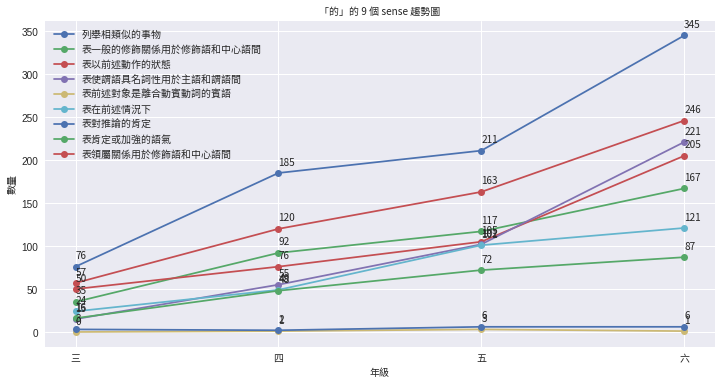

In [14]:
search_word_sense("的")

## 加分題

SenseTagger 處理詞時，會提供該詞的 POS（詞性），請統計出所有名詞、動詞、功能詞在6個年級的sense type 數量，並**畫出一張折線圖**。


*   此折線圖會有 3 條線，分別是名詞、動詞、功能詞。
*   一條折線的折點為同年級、同詞性的所有 Sense Type 數量相加。
* **加分方式**：畫出完整圖 +10 分，缺1個要素（標題、x軸 label、y軸 label、圖例、每一點數值）則少加1分

